# Análise de Dados do Instacart

## Introdução

Este projeto visa analisar dados da Instacart, uma plataforma de entrega de supermercado, para extrair insights sobre comportamentos de compra dos clientes e padrões de pedidos. O conjunto de dados contém informações sobre pedidos, produtos, departamentos e histórico de compras dos clientes.

### Objetivos
- Analisar padrões temporais de pedidos
- Identificar produtos mais populares e taxas de recompra
- Entender comportamentos de compra dos clientes
- Gerar insights acionáveis para o negócio

### Estrutura do Projeto
1. Preparação e Limpeza dos Dados
2. Análise Exploratória
3. Análise de Padrões de Compra
4. Conclusões e Recomendações

## Dicionário de dados

Cinco tabelas principais compõem o dataset:

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1: Visão Geral dos Dados

## Plano de Análise
1. Importar os dados usando pandas
2. Examinar a estrutura básica de cada DataFrame
3. Verificar tipos de dados e valores ausentes
4. Identificar possíveis problemas nos dados

## Carregamento dos Dados

In [4]:
# Importe as bibliotecas - Para tratar os dados e criar gráficos!
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# leia os conjuntos de dados em DataFrames - São 5 dataframes
df_orders = pd.read_csv("datasets/instacart_orders.csv", sep=';')
df_products = pd.read_csv("datasets/products.csv", sep=';')
df_order_products = pd.read_csv("datasets/order_products.csv", sep=';')
df_aisles = pd.read_csv("datasets/aisles.csv", sep=';')
df_departments = pd.read_csv("datasets/departments.csv", sep=';')

In [22]:
# Examinando a estrutura do DataFrame orders
print("\n-----------------------\nEstrutura do DataFrame de Pedidos\n")
df_orders.info()
print("\n-----------------------\nPrimeiros registros:\n")
print(df_orders.head())


-----------------------
Estrutura do DataFrame de Pedidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

-----------------------
Primeiros registros:

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516        

### Análise do DataFrame Orders
- Total de 478.967 registros
- 6 colunas, sendo 5 inteiras e 1 float
- Valores ausentes apenas na coluna 'days_since_prior_order' (28.819 registros)
- Cada registro representa um pedido único com informações temporais e do cliente

In [23]:
# Examinando a estrutura do DataFrame products
print("\n-----------------------\nEstrutura do DataFrame de Produtos\n")
df_products.info()
print("\n-----------------------\nPrimeiros registros:\n")
print(df_products.head())


-----------------------
Estrutura do DataFrame de Produtos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

-----------------------
Primeiros registros:

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   depa

### Análise do DataFrame Products
- 49.694 produtos cadastrados
- 4 colunas: product_id, product_name, aisle_id, department_id
- 1.258 produtos sem nome registrado
- Todos os IDs (produto, seção e departamento) estão preenchidos

In [24]:
# Examinando a estrutura do DataFrame order_products
print("\n-----------------------\nEstrutura do DataFrame de Itens em Pedidos\n")
df_order_products.info(verbose=True)
print("\n-----------------------\nPrimeiros registros:\n")
print(df_order_products.head(20))


-----------------------
Estrutura do DataFrame de Itens em Pedidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

-----------------------
Primeiros registros:

    order_id  product_id  add_to_cart_order  reordered
0    2141543       11440               17.0          0
1     567889        1560                1.0          1
2    2261212       26683                1.0          1
3     491251        8670               35.0          1
4    2571142        1940                5.0          1
5    2456893       21616                4.0          1
6     644579       12341                5.0          1
7    2231852       44925               10.0          1
8    3185766       36259         

### Análise do DataFrame Order_Products
- 4.545.007 registros de itens em pedidos
- 4 colunas: order_id, product_id, add_to_cart_order, reordered
- 836 valores ausentes na coluna add_to_cart_order
- Cada linha representa um item específico em um pedido

In [25]:
# Examinando a estrutura do DataFrame aisles
print("\n-----------------------\nEstrutura do DataFrame de Seções\n")
df_aisles.info()
print("\n-----------------------\nPrimeiros registros:\n")
print(df_aisles.head())


-----------------------
Estrutura do DataFrame de Seções

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

-----------------------
Primeiros registros:

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


### Análise do DataFrame Aisles
- 134 seções cadastradas
- Dados completos, sem valores ausentes
- Estrutura simples com ID e nome da seção

In [26]:
# Examinando a estrutura do DataFrame departments
print("\n-----------------------\nEstrutura do DataFrame de Departamentos\n")
df_departments.info()
print("\n-----------------------\nPrimeiros registros:\n")
print(df_departments.head())


-----------------------
Estrutura do DataFrame de Departamentos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

-----------------------
Primeiros registros:

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


### Análise do DataFrame Departments
- 21 departamentos cadastrados
- Dados completos, sem valores ausentes
- Estrutura simples com ID e nome do departamento

## Conclusões da Análise Inicial
1. **Integridade dos Dados**
   - Estrutura relacional bem definida entre as tabelas
   - Valores ausentes concentrados em colunas específicas
   - Sistema de IDs consistente entre as tabelas

2. **Pontos de Atenção**
   - Tratamento necessário para valores ausentes em 'days_since_prior_order'
   - Investigação dos produtos sem nome
   - Análise da ordem de adição ao carrinho com valores ausentes

# Etapa 2: Preparação de Dados

## Plano de Processamento
1. Verificar e tratar valores duplicados
2. Identificar e tratar valores ausentes
3. Validar tipos de dados

### DataFrame `orders`

In [27]:
# Verificação de duplicatas no DataFrame orders
print('Número de valores duplicados:', df_orders.duplicated().sum())
print('\nRegistros duplicados:')
print(df_orders[df_orders.duplicated()])

Número de valores duplicados: 15

Registros duplicados:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  

Há linhas duplicadas? Se sim, o que elas têm em comum?
Existem linhas duplicadas e em todas elas, os pedidos foram feitos às 2h da manhã nas quartas-feiras, o que pode ser observado na coluna 'order_hour_of_day' e na coluna 'order_dow', em que '0' significa domingo e dai em diante.

In [28]:
# Análise detalhada dos pedidos às 2h da manhã
print('Contagem de pedidos às 2h:')
print(df_orders[df_orders['order_hour_of_day'] == 2].count())
print('\nDistribuição de pedidos às 2h:')
print(df_orders[df_orders['order_hour_of_day'] == 2].value_counts())

Contagem de pedidos às 2h:
order_id                  1004
user_id                   1004
order_number              1004
order_dow                 1004
order_hour_of_day         1004
days_since_prior_order     941
dtype: int64

Distribuição de pedidos às 2h:
order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1919531   191501   32            3          2                  7.0                       2
467134    63189    21            3          2                  2.0                       2
1918001   188546   14            3          2                  16.0                      2
2282673   86751    49            3          2                  2.0                       2
1021560   53767    3             3          2                  9.0                       2
                                                                                        ..
1198786   183503   16            1          2                  6.0                       1
1203051   32927    

### Análise de Duplicatas - DataFrame Orders
O que esse resultado quer dizer?

Temos informações insuficientes para dizer das causas desse problema, mas precisamos verificar a razão pela qual as duplicatas acontecem às quartas-feiras. Não podemos supor um ataque ou um erro pontual porque, apesar das duplicatas terem acontecido às quartas feiras, elas ocorreram em dias diferentes (percebido pela coluna 'days_since_prior_order'). Eu perguntaria para a empresa se algum processo eletronico é realizado nesse periodo toda quarta feira, como algum tipo de sincronização com banco de dados ou outro processo que possa ocasionar o erro.

In [29]:
# Remoção de duplicatas do DataFrame orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

# Verificação pós-remoção
print('Número de duplicatas após tratamento:', df_orders.duplicated().sum())

Número de duplicatas após tratamento: 0


### Conclusões:

Haviam poucos pedidos duplicados, o que pode ocorrer por diversos motivos. Meu palpite é que haja algum tipo de problema de atualização de banco de dados cujo calendário envolva esse horário (duas da manhã) das quartas-feiras. Os dados foram tratados e o índice foi resetado conforme as boas práticas desse processo.

### DataFrame `products`

In [30]:
# Verificação de duplicatas no DataFrame products
print('Número de duplicatas em products:', df_products.duplicated().sum())
print('\nVerificação por departamento:')
print(df_products[df_products['department_id'].duplicated()].groupby('department_id')['department_id'].count())

Número de duplicatas em products: 0

Verificação por departamento:
department_id
1     4007
2      547
3     1515
4     1683
5     1053
6     1138
7     4365
8      971
9     1857
10      37
11    6563
12     906
13    5371
14    1116
15    2091
16    3448
17    3084
18    1080
19    6263
20    1321
21    1257
Name: department_id, dtype: int64


### Análise de Duplicatas - DataFrame Products
- Sem duplicatas completas de registros
- Duplicatas de department_id são esperadas (produtos diferentes no mesmo departamento)
- Nomes de produtos convertidos para minúsculas para padronização

### DataFrame `departments`

In [31]:
# Verificação de duplicatas no DataFrame departments
print('Número de duplicatas em departments:', df_departments.duplicated().sum())
print('\nRegistros duplicados:')
print(df_departments[df_departments.duplicated()])

Número de duplicatas em departments: 0

Registros duplicados:
Empty DataFrame
Columns: [department_id, department]
Index: []


In [32]:
# Análise detalhada dos IDs
print('\nVerificação de IDs únicos:')
print(df_departments['department_id'].unique())
print('\nTotal de departamentos únicos:', df_departments['department_id'].nunique())


Verificação de IDs únicos:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Total de departamentos únicos: 21


### Análise de Duplicatas - DataFrame Departments
- Sem duplicatas identificadas
- 21 departamentos únicos
- IDs sequenciais e bem estruturados (1-21)

### DataFrame `aisles`

In [33]:
# Verificação de duplicatas no DataFrame aisles
print('Número de duplicatas em aisles:', df_aisles.duplicated().sum())
print('\nRegistros duplicados:')
print(df_aisles[df_aisles.duplicated()])

Número de duplicatas em aisles: 0

Registros duplicados:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [34]:
# Análise de IDs únicos
print('\nTotal de seções únicas:', df_aisles['aisle_id'].nunique())


Total de seções únicas: 134


### Análise de Duplicatas - DataFrame Aisles
- Sem duplicatas identificadas
- 134 seções únicas
- Estrutura de dados íntegra

### DataFrame `order_products`

In [35]:
# Verificação de duplicatas no DataFrame order_products
print('Número de duplicatas em order_products:', df_order_products.duplicated().sum())
print('\nRegistros duplicados:')
print(df_order_products[df_order_products.duplicated(subset=['order_id','product_id'])])


Número de duplicatas em order_products: 0

Registros duplicados:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [36]:
# Análise de valores únicos
print('\nAnálise dos IDs de pedidos:')
print('Valores únicos:', df_order_products['order_id'].unique())
print('\nTotal de pedidos únicos:', df_order_products['order_id'].nunique())

print('\nAnálise dos IDs de produtos:')
print('Valores únicos:', df_order_products['product_id'].unique())
print('\nTotal de produtos únicos:', df_order_products['product_id'].nunique())


Análise dos IDs de pedidos:
Valores únicos: [2141543  567889 2261212 ...  812418 2666881 1461911]

Total de pedidos únicos: 450046

Análise dos IDs de produtos:
Valores únicos: [11440  1560 26683 ... 49153  8182 40024]

Total de produtos únicos: 45573


### Análise de Duplicatas - DataFrame Order_Products
- Sem duplicatas diretas identificadas
- 450.046 pedidos únicos
- 45.573 produtos únicos em pedidos
- Situação complexa devido à natureza dos dados:
  - Um pedido pode conter vários produtos
  - Um produto pode aparecer em múltiplos pedidos
  - Duplicatas de combinações order_id/product_id são importantes para análise de recompra

## Encontrar e remover valores ausentes

Identificamos valores ausentes nas seguintes colunas:
- Coluna 'product_name' na tabela products
- Coluna 'days_since_prior_order' na tabela orders
- Coluna 'add_to_cart_order' na tabela order_products


### DataFrame `products`

In [37]:
# Análise de valores ausentes no DataFrame products
print('Verificando ausentes no DataFrame products:')
print(df_products.isna().sum())
print('\nVerificando ausentes na coluna "product_name":')
print(df_products['product_name'].isna().sum())

Verificando ausentes no DataFrame products:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Verificando ausentes na coluna "product_name":
1258


### Análise de Valores Ausentes - DataFrame Products
- 1.258 produtos sem nome registrado
- Demais colunas completamente preenchidas

In [38]:
# Verificação de produtos sem nome por seção
secao_produtos_sem_nome = df_products.loc[df_products['product_name'].isna(), 'aisle_id']
print(secao_produtos_sem_nome)


37       100
71       100
109      100
296      100
416      100
        ... 
49552    100
49574    100
49640    100
49663    100
49668    100
Name: aisle_id, Length: 1258, dtype: int64


In [39]:
# Verificação de produtos sem nome por departamento
departamento_produtos_sem_nome = df_products.loc[df_products['product_name'].isna(), 'department_id']
print(departamento_produtos_sem_nome)

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


In [40]:
# Verificação das seções e departamentos afetados
print('Tabela de departamentos')
print(df_departments[df_departments['department_id']== 21])
print('\nTabela de seções')
print(df_aisles[df_aisles['aisle_id']== 100])

# Tratamento dos valores ausentes
df_departments['department'] = df_departments['department'].replace('missing', np.nan).fillna('Unknown')
df_aisles['aisle'] = df_aisles['aisle'].fillna('Unknown')

Tabela de departamentos
    department_id department
20             21    missing

Tabela de seções
    aisle_id    aisle
99       100  missing


### Conclusões sobre Valores Ausentes no DataFrame Products
- Valores ausentes concentrados na seção 100 e departamento 21
- Seção e departamento marcados como "Unknown" após tratamento
- Padrão sistemático sugere possível problema de integração de dados
- Por meio dessa tabela não temos acesso ao nome dessa seção e desse departamento.


### DataFrame `orders`

In [41]:
# Análise de valores ausentes no DataFrame orders
print('Verificando ausentes no DataFrame orders:')
print(df_orders.isna().sum())

Verificando ausentes no DataFrame orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [42]:
# Verificação de valores ausentes em pedidos não iniciais
pedido_sem_cliente = df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)]
print('Pedidos não iniciais com valores ausentes:')
print(pedido_sem_cliente)

Pedidos não iniciais com valores ausentes:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### Análise de Valores Ausentes - DataFrame Orders
- 28.817 valores ausentes em 'days_since_prior_order'
- Valores ausentes aparecem apenas em primeiros pedidos
- Comportamento esperado já que não há pedido anterior para primeiras compras

### DataFrame `order_products`

In [43]:
# Análise de valores ausentes no DataFrame order_products
print('Verificando ausentes no DataFrame order_products:')
print(df_order_products.isna().sum())

Verificando ausentes no DataFrame order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [44]:
# Análise dos valores na coluna add_to_cart_order
print('Valores mínimos da coluna "add_to_cart_order"')
print(df_order_products['add_to_cart_order'].min())
print('\nValores máximos da coluna "add_to_cart_order"')
print(df_order_products['add_to_cart_order'].max())

Valores mínimos da coluna "add_to_cart_order"
1.0

Valores máximos da coluna "add_to_cart_order"
64.0


In [48]:
# Verificação de produtos com ordem de adição ausente
ids_valores_ausentes = df_order_products.loc[df_order_products['add_to_cart_order'].isna(), 'product_id']
print('Produtos com ordem de adição ausente:')
print(ids_valores_ausentes)

# Tratamento dos valores ausentes
df_order_products.fillna({'add_to_cart_order': 999}, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

Produtos com ordem de adição ausente:
Series([], Name: product_id, dtype: int64)


### Análise de Valores Ausentes - DataFrame Order_Products
- 836 valores ausentes em 'add_to_cart_order'
- Ordem de adição varia de 1 a 64 produtos por pedido
- Valores ausentes substituídos por 999 para identificação em análises futuras

## Conclusões Gerais do Tratamento de Dados
1. **Valores Ausentes**
   - Identificados e tratados em três DataFrames principais
   - Tratamentos específicos aplicados para cada caso
   - Mantida rastreabilidade dos dados tratados

2. **Impacto na Análise**
   - Dados mantêm coerência para análises posteriores
   - Tratamentos não comprometem integridade das relações
   - Valores substitutos escolhidos para facilitar identificação

# Etapa 3: Análise de Dados

## A. Análise Básica

### 1. Verificação dos valores nas colunas temporais

In [49]:
# Verificação dos valores em order_hour_of_day
print('Valor mínimo da coluna "order_hour_of_day":', df_orders['order_hour_of_day'].min())
print('Valor máximo da coluna "order_hour_of_day":', df_orders['order_hour_of_day'].max())

Valor mínimo da coluna "order_hour_of_day": 0
Valor máximo da coluna "order_hour_of_day": 23


In [50]:
# Verificação dos valores em order_dow
print('Valor mínimo da coluna "order_dow":', df_orders['order_dow'].min())
print('Valor máximo da coluna "order_dow":', df_orders['order_dow'].max())

Valor mínimo da coluna "order_dow": 0
Valor máximo da coluna "order_dow": 6


### Análise de Valores Temporais
- Horas do dia: variam de 0 a 23 (24 horas)
- Dias da semana: variam de 0 a 6 (domingo a sábado)
- Dados temporais consistentes e dentro dos intervalos esperados

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

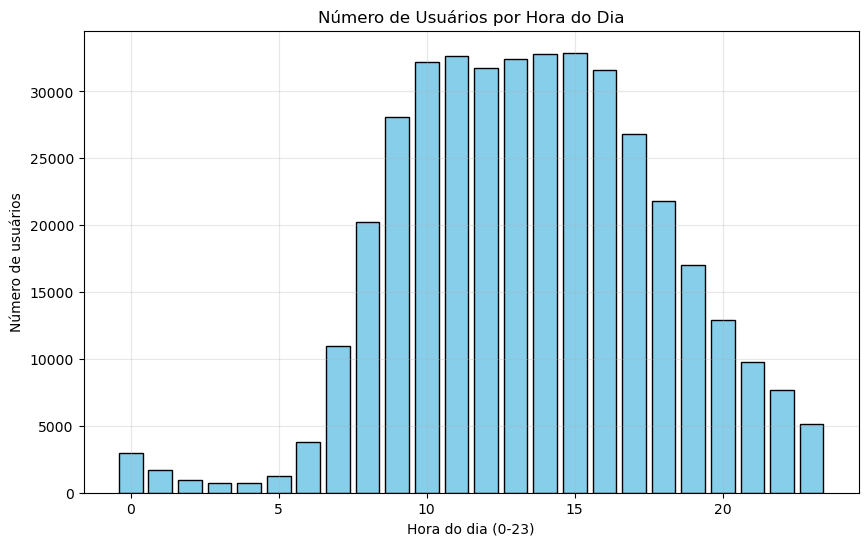

In [51]:
# Análise de pedidos por hora do dia
cliente_por_horario = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Visualização através de gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cliente_por_horario.index, cliente_por_horario.values, color='skyblue', edgecolor='black')
plt.title('Número de Usuários por Hora do Dia')
plt.xlabel('Hora do dia (0-23)')
plt.ylabel('Número de usuários')
plt.grid(True, alpha=0.3)
plt.show()

### Análise do gráfico "Número de Usuários por Hora do Dia":

- O período onde as vendas atingem o pico é das 10h às 15h.
- O dia da semana em que ocorrem mais compras é o domingo.
- A Maioria dos usuários demora 30 dias para realizar nova compra.

### [A3] Em que dia da semana as pessoas fazem compras?

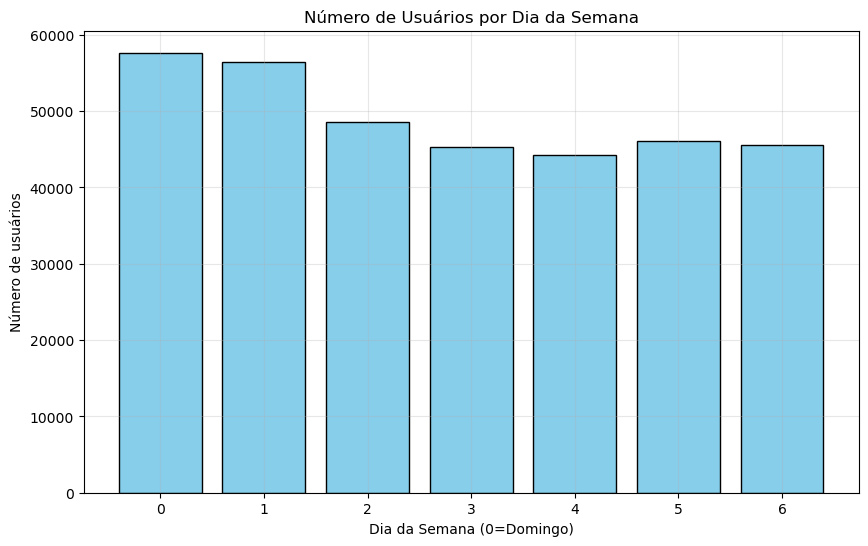

In [52]:
# Análise de pedidos por dia da semana
cliente_por_dia_da_semana = df_orders.groupby('order_dow')['user_id'].nunique()

# Visualização através de gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cliente_por_dia_da_semana.index, cliente_por_dia_da_semana.values, color='skyblue', edgecolor='black')
plt.title('Número de Usuários por Dia da Semana')
plt.xlabel('Dia da Semana (0=Domingo)')
plt.ylabel('Número de usuários')
plt.grid(True, alpha=0.3)
plt.show()

### Análise do gráfico "Número de Usuários por Dia da Semana":
- O dia da semana em que ocorrem mais compras é o domingo

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

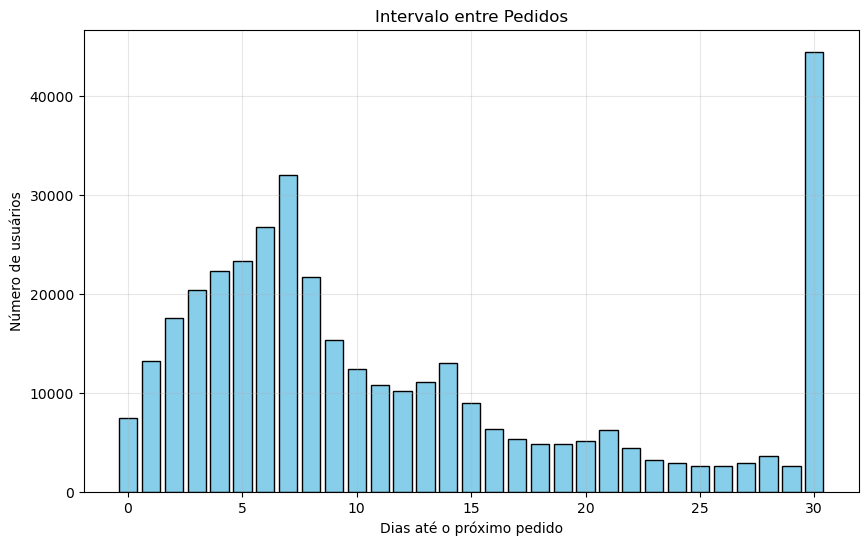

In [53]:
# Análise do tempo entre pedidos
espera_ate_proxima_compra = df_orders.groupby('days_since_prior_order')['user_id'].nunique()

# Visualização através de gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(espera_ate_proxima_compra.index, espera_ate_proxima_compra.values, color='skyblue', edgecolor='black')
plt.title('Intervalo entre Pedidos')
plt.xlabel('Dias até o próximo pedido')
plt.ylabel('Número de usuários')
plt.grid(True, alpha=0.3)
plt.show()

## Conclusões da Análise Básica

1. **Padrões Temporais**
   - Pico de pedidos entre 10h e 15h
   - Maior volume aos domingos
   - Maioria dos usuários realiza novo pedido em 30 dias

2. **Insights Operacionais**
   - Necessidade de maior capacidade operacional no horário de pico
   - Planejamento especial para domingos
   - Oportunidade para estimular recompras antes dos 30 dias

## B. Análise Intermediária

### 1. Comparação de pedidos entre quartas e sábados

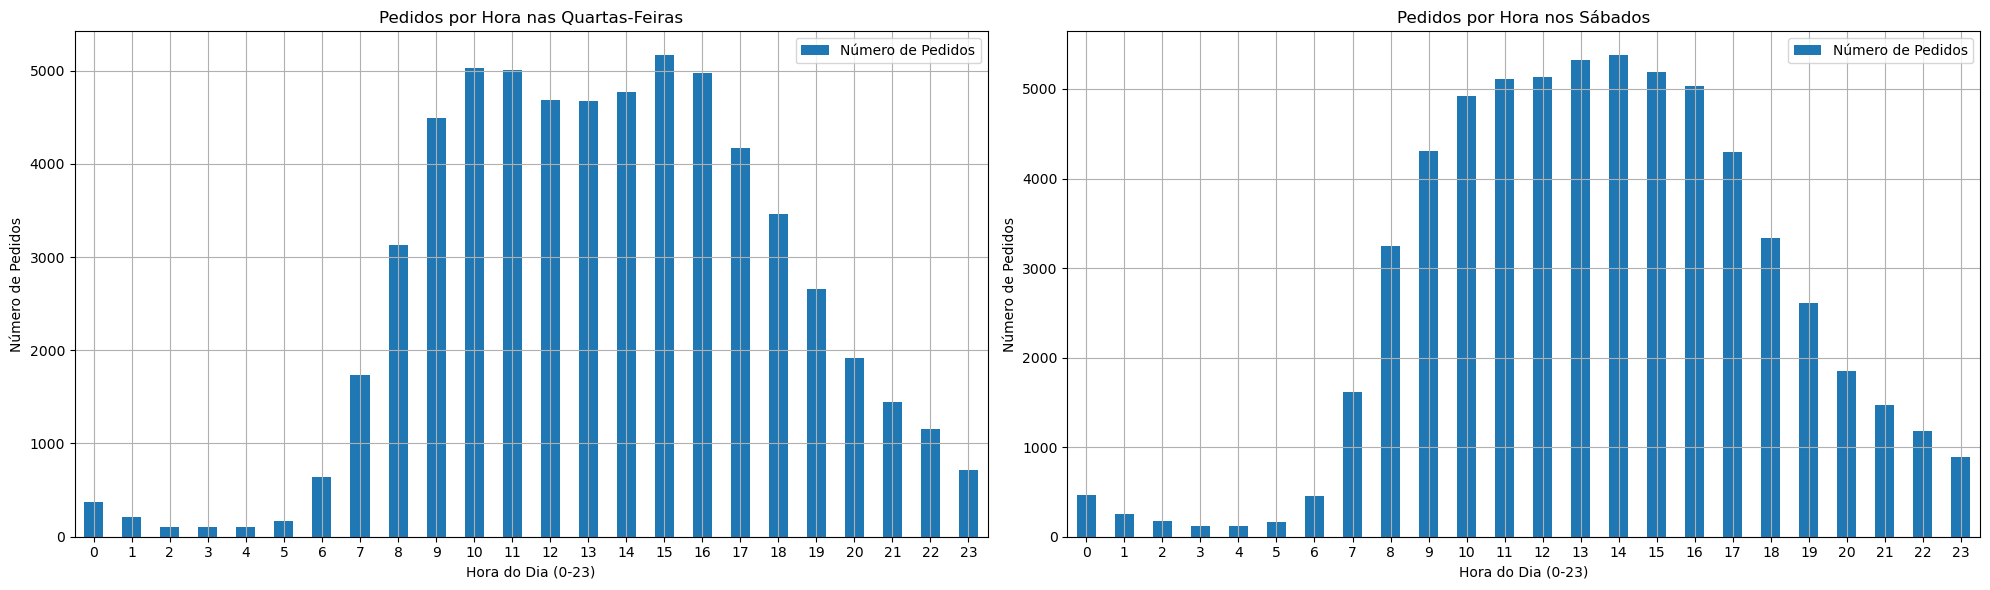

In [54]:
# Filtrar dados para quartas-feiras (order_dow = 3)
quarta_orders = df_orders[df_orders['order_dow'] == 3]
quarta_contagem_por_hora = quarta_orders.groupby('order_hour_of_day')['order_id'].count()

# Filtrar dados para sábados (order_dow = 6)
sabado_orders = df_orders[df_orders['order_dow'] == 6]
sabado_contagem_por_hora = sabado_orders.groupby('order_hour_of_day')['order_id'].count()

# Criar gráficos comparativos
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de quartas-feiras
df_quarta = pd.DataFrame({'Hora do dia': quarta_contagem_por_hora.index, 
                         'Número de Pedidos': quarta_contagem_por_hora.values})
df_quarta.plot(ax=ax[0], x='Hora do dia', y='Número de Pedidos',
               title='Pedidos por Hora nas Quartas-Feiras',
               kind='bar', xlabel='Hora do Dia (0-23)',
               ylabel='Número de Pedidos', grid=True)
ax[0].set_xticklabels(df_quarta['Hora do dia'], rotation=0)

# Gráfico de sábados
df_sabado = pd.DataFrame({'Hora do dia': sabado_contagem_por_hora.index,
                         'Número de Pedidos': sabado_contagem_por_hora.values})
df_sabado.plot(ax=ax[1], x='Hora do dia', y='Número de Pedidos',
               title='Pedidos por Hora nos Sábados',
               kind='bar', xlabel='Hora do Dia (0-23)',
               ylabel='Número de Pedidos', grid=True)
ax[1].set_xticklabels(df_sabado['Hora do dia'], rotation=0)

plt.tight_layout()
plt.show()

### Análise Comparativa Quarta vs Sábado
- Quartas-feiras: pico de pedidos mais acentuado no horário comercial
- Sábados: distribuição mais uniforme ao longo do dia
- Diferença reflete padrões distintos de comportamento entre dias úteis e fim de semana

###  Qual é a distribuição do número de pedidos por cliente?

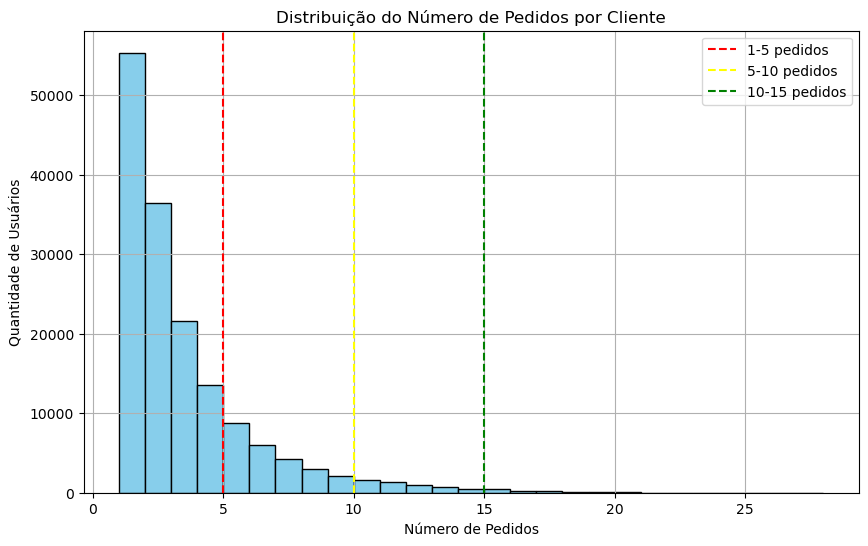

In [55]:
# Análise da distribuição de pedidos por cliente
contagem_pedidos_por_cliente = df_orders.groupby('user_id').size()

# Visualização da distribuição
plt.figure(figsize=(10, 6))
plt.hist(contagem_pedidos_por_cliente, bins=range(1, contagem_pedidos_por_cliente.max()+1), 
         color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Quantidade de Usuários')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='1-5 pedidos')
plt.axvline(x=10, color='yellow', linestyle='--', label='5-10 pedidos')
plt.axvline(x=15, color='green', linestyle='--', label='10-15 pedidos')
plt.legend()
plt.show()



### Análise do gráfico "Distribuição do Número de Pedidos por Cliente"

- Clientes com um único pedido representam a maior categoria individual, com 55.357 usuários. Esse número indica clientes que podem ter experimentado o serviço ou produto uma vez, mas não retornaram. Isso pode ser devido a alguma estratégia bem feita para primeira compra, mas indica tambem que a empresa necessita reter esses clientes, pois temos um declínio rápido nas frequências de compras. À medida que o número de pedidos aumenta, a quantidade de usuários em cada categoria diminui vertiginosamente.
- Há um pequeníssimo número de usuários com muitos pedidos (26 a 28 pedidos), o que pode indicar clientes altamente leais ou talvez grandes consumidores. Estes clientes são extremamente valiosos e podem ser o foco de programas de fidelidade ou ofertas especiais para manter sua lealdade.
- A faixa de 1 a 5 pedidos é onde encontramos a maior concentração de pedidos e após essa faixa, percebemos um declinio considerável nas faixas subsequentes de maneira que ao chegarmos no vigésimo oitavo pedido, fica evidente que pouqissimos clientes reincidem tão recorrentemente nessa plataforma.

### Quais são os 20 produtos mais populares? Exiba os IDs e nomes

In [56]:
# Análise dos 20 produtos mais frequentes
contagem_produtos = df_order_products['product_id'].value_counts()
contagem_produtos_df = pd.DataFrame({'product_id': contagem_produtos.index, 
                                   'order_count': contagem_produtos.values})
merged_data = pd.merge(contagem_produtos_df, df_products, on='product_id')
mais_vendidos = merged_data.sort_values(by='order_count', ascending=False).head(20)

print('20 Produtos Mais Vendidos:')
print(mais_vendidos[['product_id', 'product_name', 'order_count']])

20 Produtos Mais Vendidos:
    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
1

## Conclusões da Análise Intermediária

1. **Padrões de Compra**
   - Maioria dos clientes faz entre 1-5 pedidos
   - Declínio acentuado após 5 pedidos
   - Pequeno grupo de clientes altamente ativos (>15 pedidos)

2. **Produtos Populares**
   - Produtos orgânicos dominam o ranking
   - Frutas e vegetais são categorias mais frequentes
   - Bananas lideram em número de pedidos

3. **Insights para Negócio**
   - Oportunidade de retenção após primeiras compras
   - Potencial para estratégias específicas em diferentes dias
   - Foco em produtos orgânicos como diferencial

## C. Análise Avançada

### 1. Distribuição de itens por pedido

### Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

Estatísticas de Itens por Pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


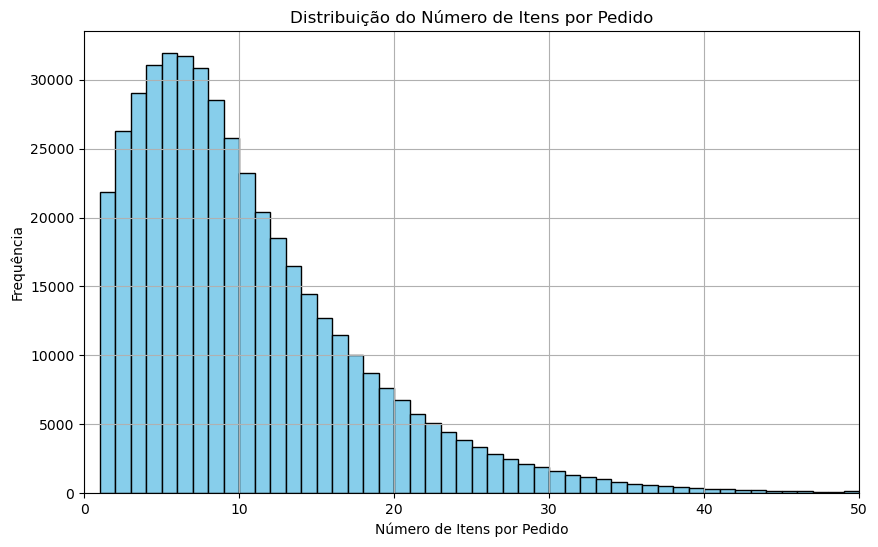

In [57]:
# Contagem de itens por pedido
contagem_itens = df_order_products.groupby('order_id').size()

# Estatísticas descritivas
print('Estatísticas de Itens por Pedido:')
print(contagem_itens.describe())

# Visualização da distribuição
plt.figure(figsize=(10, 6))
plt.hist(contagem_itens, bins=range(1, 51), edgecolor='black', color='skyblue')
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Frequência')
plt.grid(True)
plt.xlim(0, 50)
plt.show()

### Análise da Distribuição de Itens
- Média de 10 itens por pedido
- 50% dos pedidos têm entre 5 e 14 itens
- Máximo de 127 itens em um único pedido

### Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [58]:
# Análise de produtos em pedidos repetidos
reordered_items = df_order_products[df_order_products['reordered'] == 1]
reorder_contagem = reordered_items.groupby('product_id').size()
reorder_contagem_df = pd.DataFrame({'product_id': reorder_contagem.index, 
                                  'reorder_contagem': reorder_contagem.values})
mesclagem_dfs = pd.merge(reorder_contagem_df, df_products, on='product_id')
organizacao_mesclagem_dfs = mesclagem_dfs.sort_values(by='reorder_contagem', 
                                                     ascending=False).head(20)

print('20 Produtos Mais Recomprados:')
print(organizacao_mesclagem_dfs[['product_id', 'product_name', 'reorder_contagem']])

20 Produtos Mais Recomprados:
       product_id              product_name  reorder_contagem
18104       24852                    Banana             55763
9528        13176    Bag of Organic Bananas             44450
15368       21137      Organic Strawberries             28639
15936       21903      Organic Baby Spinach             26233
34407       47209      Organic Hass Avocado             23629
34828       47766           Organic Avocado             18743
20285       27845        Organic Whole Milk             16251
34725       47626               Large Lemon             15044
20375       27966       Organic Raspberries             14748
12193       16797              Strawberries             13945
19088       26209                     Limes             13327
16700       22935      Organic Yellow Onion             11145
18186       24964            Organic Garlic             10411
32792       45007          Organic Zucchini             10076
36219       49683            Cucumber Ki

### Análise dos Produtos Mais Recomprados
- Bananas (tanto orgânicas quanto convencionais) lideram com ampla margem
- Produtos orgânicos dominam a lista, ocupando 13 das 20 posições
- Frutas e vegetais são as categorias mais representativas
- O padrão sugere foco em produtos frescos e saudáveis
- As quantidades de recompra são expressivas, indo de 8.389 a 55.763 pedidos

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [60]:
# Análise da proporção de recompra por produto
reorder_percentage = df_order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_percentage.rename(columns={'reordered': 'reorder_ratio'}, inplace=True)
nomes_repeticao = pd.merge(reorder_percentage, df_products, on='product_id')
nomes_repeticao = nomes_repeticao.sort_values(by='reorder_ratio', ascending=False)

print('\nProdutos com Maior Taxa de Recompra:')
print(nomes_repeticao[['product_id', 'product_name', 'reorder_ratio']].head(20))


Produtos com Maior Taxa de Recompra:
       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       45035         

### Análise das Taxas de Recompra
- 20 produtos apresentam taxa de recompra de 100%
- Lista mais diversificada, incluindo:
  - Suplementos (Bone Strength)
  - Produtos de conveniência (Cookies, Baking Mix)
  - Produtos específicos (Dental Tape, Hair Color)
  - Alimentos especiais (Non-Dairy, Sugar Free)
- Produtos mais nichados que os mais recomprados em volume
- Indica forte fidelização em categorias específicas

# Conclusão geral do projeto:

Resolvi separar minhas conslusões em tópicos e ficaram da seguinte maneira:

## Principais Descobertas

1. **Padrões Temporais**
   - Pico de pedidos entre 10h e 15h
   - Maior volume aos domingos
   - Padrões distintos entre dias úteis e finais de semana
   - Maioria dos usuários retorna em 30 dias

2. **Comportamento de Compra**
   - Média de 10 itens por pedido
   - Maioria dos clientes faz entre 1-5 pedidos
   - Pedidos concentrados entre 5-14 itens
   - Pequeno grupo de clientes altamente ativos

3. **Produtos e Categorias**
   - Produtos orgânicos dominam as vendas
   - Bananas são o item mais vendido
   - Produtos frescos lideram em volume
   - Nichos específicos com alta fidelização

## Recomendações Estratégicas

1. **Operações**
   - Otimizar capacidade para horários de pico
   - Planejamento especial para domingos
   - Dimensionar equipe conforme padrões semanais

2. **Marketing**
   - Desenvolver programa de fidelidade
   - Foco em retenção após primeiras compras
   - Promoções específicas para produtos orgânicos
   - Estratégias diferentes para dias úteis e fins de semana

3. **Produto**
   - Manter foco em produtos frescos e orgânicos
   - Desenvolver ofertas para nichos específicos
   - Considerar cestas básicas pré-montadas
   - Garantir disponibilidade de produtos mais recomprados

# Obrigado pela atenção até aqui! Espero que isso poda iluminar nossos caminhos pelo mundo dos dados!